C:\Users\TESTER\AppData\Local\Temp\ipykernel_15036\3954296979.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


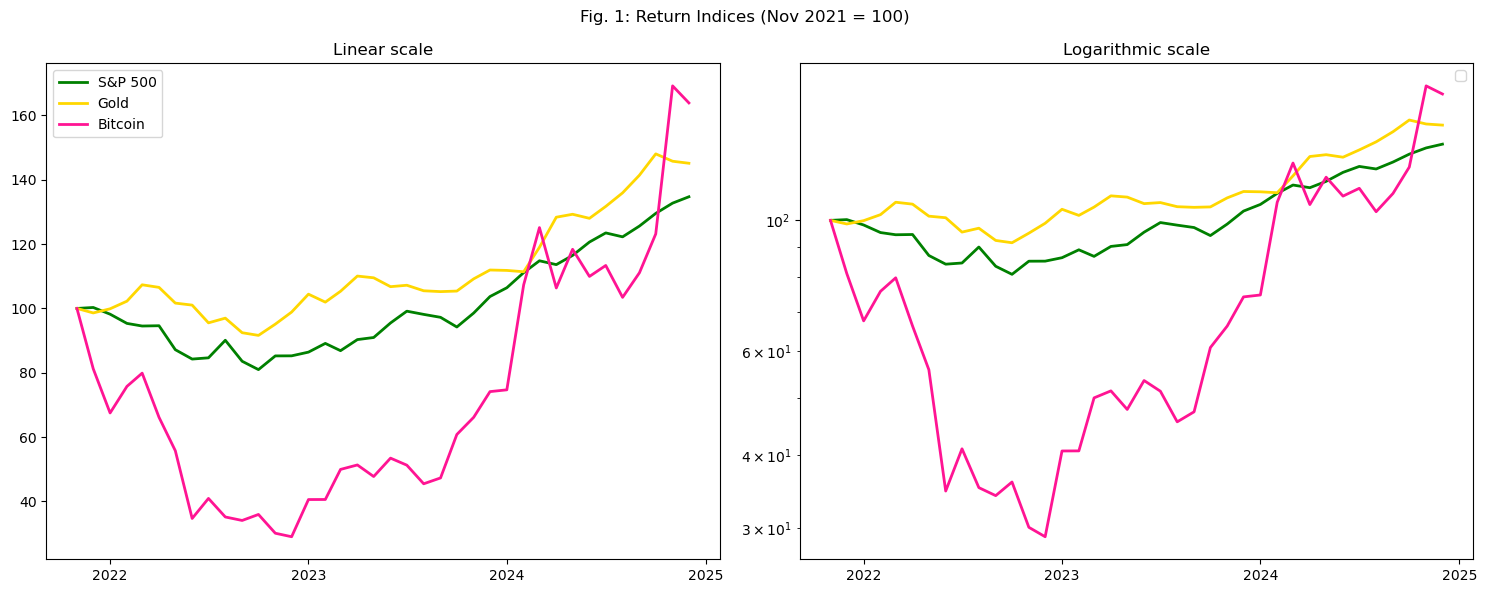

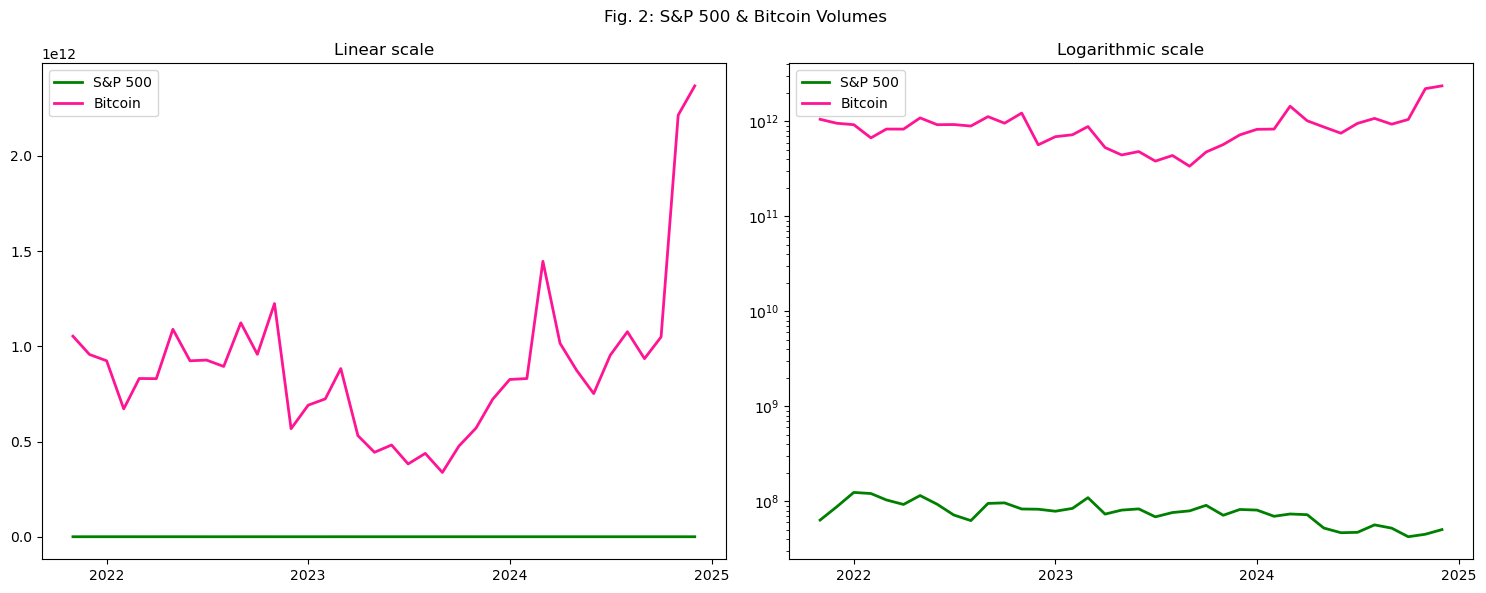

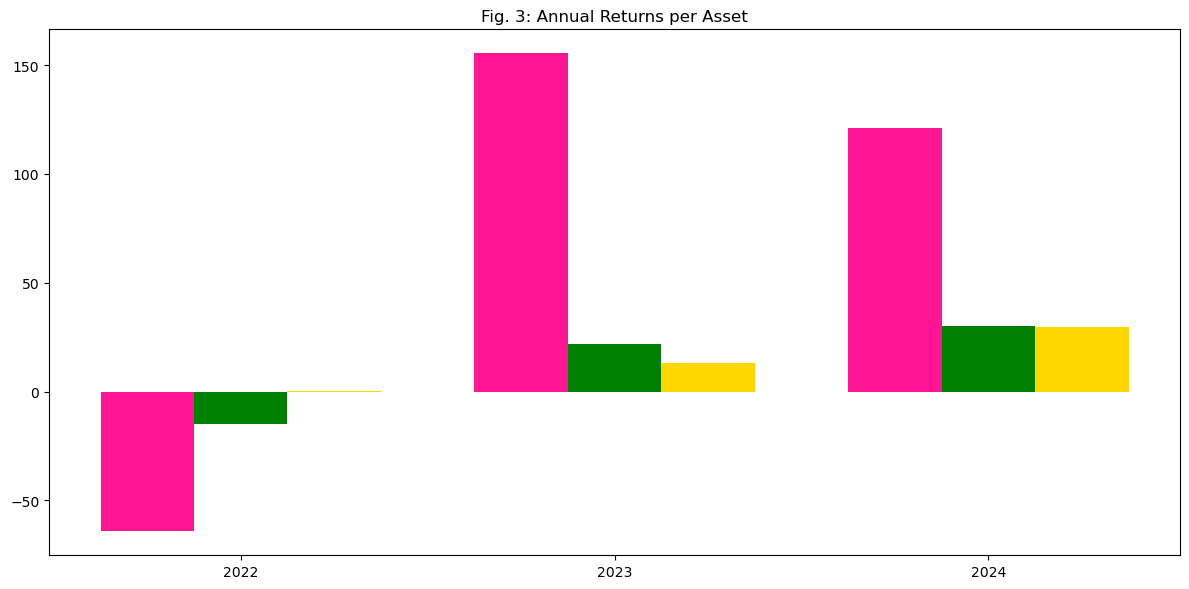

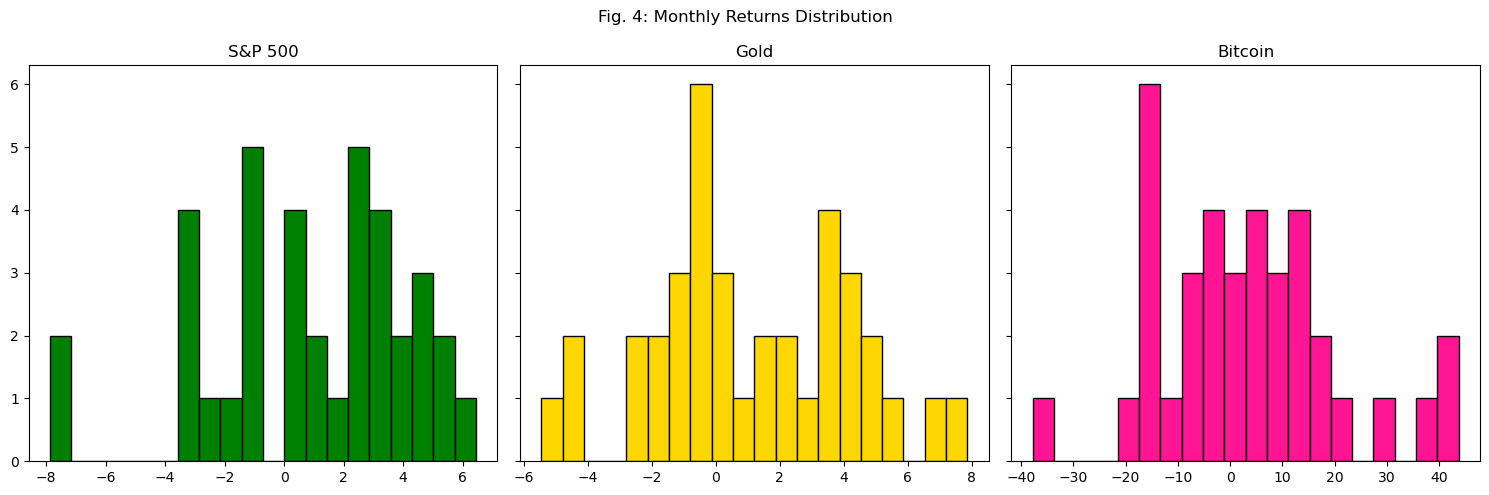

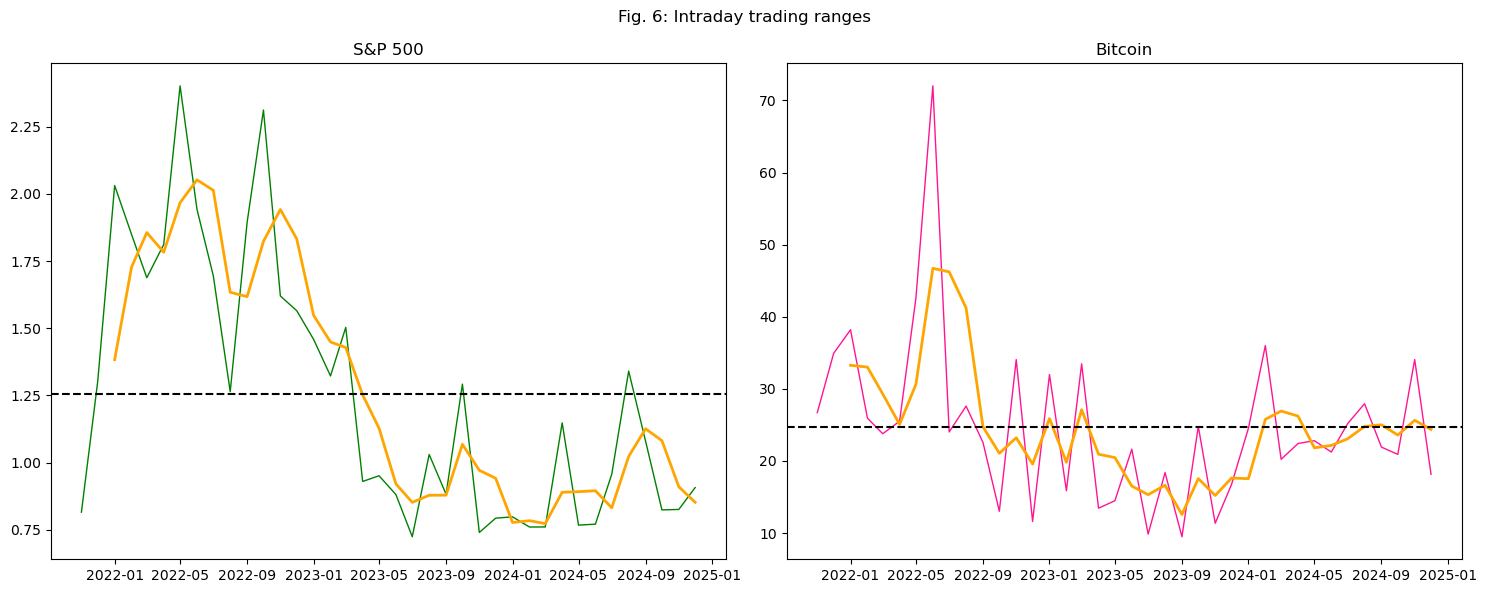

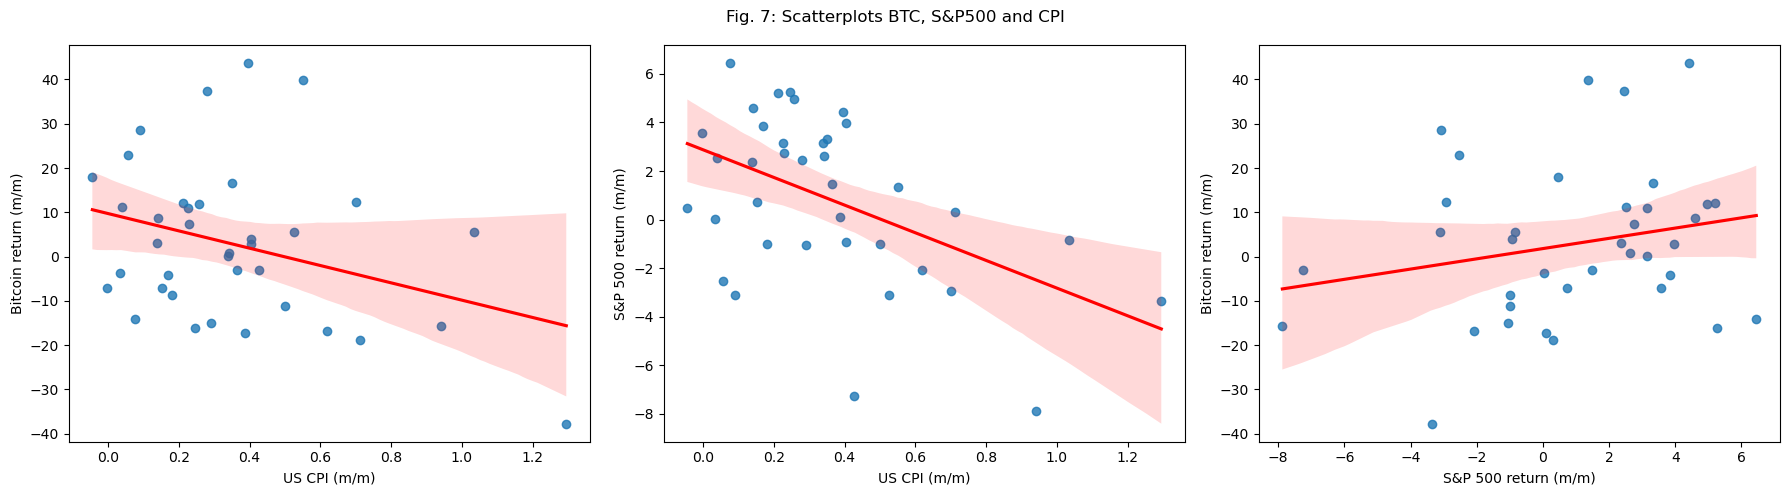

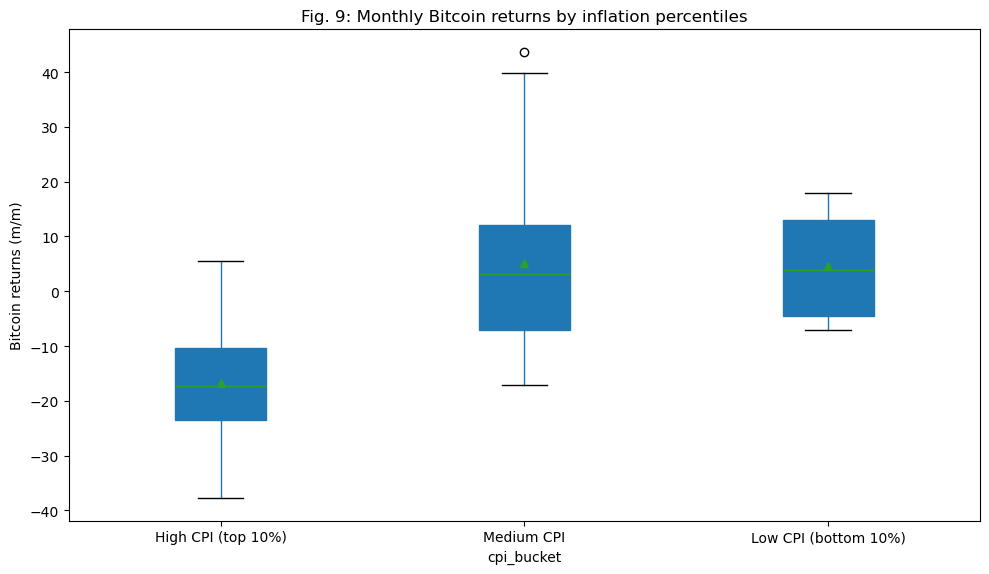

In [4]:
# 04_new_data_analysis.ipynb

# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Read Dataset
final_df_new_pd = pd.read_csv('../data/final_df_new.csv', parse_dates=['month'])
final_df_new_pd['month'] = pd.to_datetime(final_df_new_pd['month'])

#########################################
# Fig. 1 - Return Indices
#########################################

def create_return_index(series):
    return series / series.iloc[0] * 100

btc_idx = create_return_index(final_df_new_pd['avg_close_btc'])
sp500_idx = create_return_index(final_df_new_pd['avg_close_sp500'])
gold_idx = create_return_index(final_df_new_pd['avg_price_gold'])

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(final_df_new_pd['month'], sp500_idx, label='S&P 500', color='green', linewidth=2)
axes[0].plot(final_df_new_pd['month'], gold_idx, label='Gold', color='gold', linewidth=2)
axes[0].plot(final_df_new_pd['month'], btc_idx, label='Bitcoin', color='deeppink', linewidth=2)
axes[0].set_title('Linear scale')
axes[0].legend()

axes[1].plot(final_df_new_pd['month'], sp500_idx, color='green', linewidth=2)
axes[1].plot(final_df_new_pd['month'], gold_idx, color='gold', linewidth=2)
axes[1].plot(final_df_new_pd['month'], btc_idx, color='deeppink', linewidth=2)
axes[1].set_yscale('log')
axes[1].set_title('Logarithmic scale')
axes[1].legend()

for ax in axes:
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.suptitle('Fig. 1: Return Indices (Nov 2021 = 100)')
plt.tight_layout()
plt.savefig('../figures_new/figure_1.png', dpi=300)
plt.show()

#########################################
# Fig. 2 - Trading Volumes
#########################################

btc_vol = final_df_new_pd['avg_volume_btc']
sp500_vol = final_df_new_pd['avg_volume_sp500']

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(final_df_new_pd['month'], sp500_vol, color='green', linewidth=2)
axes[0].plot(final_df_new_pd['month'], btc_vol, color='deeppink', linewidth=2)
axes[0].set_title('Linear scale')
axes[0].legend(['S&P 500', 'Bitcoin'])

axes[1].plot(final_df_new_pd['month'], sp500_vol, color='green', linewidth=2)
axes[1].plot(final_df_new_pd['month'], btc_vol, color='deeppink', linewidth=2)
axes[1].set_yscale('log')
axes[1].set_title('Logarithmic scale')
axes[1].legend(['S&P 500', 'Bitcoin'])

for ax in axes:
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.suptitle('Fig. 2: S&P 500 & Bitcoin Volumes')
plt.tight_layout()
plt.savefig('../figures_new/figure_2.png', dpi=300)
plt.show()

#########################################
# Fig. 3 - Annual Returns
#########################################

final_df_new_pd['year'] = final_df_new_pd['month'].dt.year

annual_prices = final_df_new_pd.groupby('year').agg({
    'avg_close_btc': 'last',
    'avg_close_sp500': 'last',
    'avg_price_gold': 'last'
})

annual_returns = annual_prices.pct_change() * 100
annual_returns = annual_returns.dropna().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))

width = 0.25
x = annual_returns['year']

ax.bar(x - width, annual_returns['avg_close_btc'], width=width, color='deeppink')
ax.bar(x, annual_returns['avg_close_sp500'], width=width, color='green')
ax.bar(x + width, annual_returns['avg_price_gold'], width=width, color='gold')

plt.title('Fig. 3: Annual Returns per Asset')
plt.xticks(x)
plt.tight_layout()
plt.savefig('../figures_new/figure_3.png', dpi=300)
plt.show()

#########################################
# Fig. 4 - Monthly Returns Distribution
#########################################

returns = final_df_new_pd[['avg_close_btc', 'avg_close_sp500', 'avg_price_gold']].pct_change().dropna() * 100

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

axes[0].hist(returns['avg_close_sp500'], bins=20, color='green', edgecolor='black')
axes[0].set_title('S&P 500')

axes[1].hist(returns['avg_price_gold'], bins=20, color='gold', edgecolor='black')
axes[1].set_title('Gold')

axes[2].hist(returns['avg_close_btc'], bins=20, color='deeppink', edgecolor='black')
axes[2].set_title('Bitcoin')

plt.suptitle('Fig. 4: Monthly Returns Distribution')
plt.tight_layout()
plt.savefig('../figures_new/figure_4.png', dpi=300)
plt.show()

#########################################
# Fig. 5 - Summary Statistics Table
#########################################

years = (final_df_new_pd['month'].iloc[-1] - final_df_new_pd['month'].iloc[0]).days / 365.25

def annual_return(series):
    return ((series.iloc[-1] / series.iloc[0]) ** (1 / years) - 1) * 100

def annual_volatility(series):
    return series.std() * np.sqrt(12) * 100

def sharpe_ratio(series):
    return (series.mean() / series.std()) * np.sqrt(12)

def max_drawdown(series):
    roll_max = series.cummax()
    drawdown = (series / roll_max - 1) * 100
    return drawdown.min()

def var_95(series):
    return np.percentile(series, 5) * 100

def cvar_5(series):
    return series[series <= np.percentile(series, 5)].mean() * 100

summary = pd.DataFrame({
    'S&P 500': [
        annual_return(final_df_new_pd['avg_close_sp500']),
        annual_volatility(returns['avg_close_sp500']),
        sharpe_ratio(returns['avg_close_sp500']),
        max_drawdown(final_df_new_pd['avg_close_sp500']),
        -33.9,
        var_95(returns['avg_close_sp500']),
        cvar_5(returns['avg_close_sp500'])
    ],
    'Gold': [
        annual_return(final_df_new_pd['avg_price_gold']),
        annual_volatility(returns['avg_price_gold']),
        sharpe_ratio(returns['avg_price_gold']),
        max_drawdown(final_df_new_pd['avg_price_gold']),
        np.nan,
        var_95(returns['avg_price_gold']),
        cvar_5(returns['avg_price_gold'])
    ],
    'Bitcoin': [
        annual_return(final_df_new_pd['avg_close_btc']),
        annual_volatility(returns['avg_close_btc']),
        sharpe_ratio(returns['avg_close_btc']),
        max_drawdown(final_df_new_pd['avg_close_btc']),
        -83,
        var_95(returns['avg_close_btc']),
        cvar_5(returns['avg_close_btc'])
    ]
}, index=[
    'Annual return (in %)', 'Annual volatility (in %)', 'Sharpe ratio',
    'Max. drawdown (monthly, in %)', 'Max. drawdown (daily, in %)',
    'VaR(95) (in %)', 'CVaR(5) (in %)'
])

summary = summary.round(1)
summary.to_csv('../figures_new/figure_5_summary_stats.csv')

#########################################
# Fig. 6 - Intraday Range Approximation
#########################################

btc_range = (final_df_new_pd['avg_high_btc'] - final_df_new_pd['avg_low_btc']) / final_df_new_pd['avg_close_btc'] * 100
sp500_range = (final_df_new_pd['avg_high_sp500'] - final_df_new_pd['avg_low_sp500']) / final_df_new_pd['avg_close_sp500'] * 100

btc_roll = btc_range.rolling(3).mean()
sp500_roll = sp500_range.rolling(3).mean()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(final_df_new_pd['month'], sp500_range, color='green', linewidth=1)
axes[0].plot(final_df_new_pd['month'], sp500_roll, color='orange', linewidth=2)
axes[0].axhline(sp500_range.mean(), color='black', linestyle='--')
axes[0].set_title('S&P 500')

axes[1].plot(final_df_new_pd['month'], btc_range, color='deeppink', linewidth=1)
axes[1].plot(final_df_new_pd['month'], btc_roll, color='orange', linewidth=2)
axes[1].axhline(btc_range.mean(), color='black', linestyle='--')
axes[1].set_title('Bitcoin')

plt.suptitle('Fig. 6: Intraday trading ranges')
plt.tight_layout()
plt.savefig('../figures_new/figure_6.png', dpi=300)
plt.show()

#########################################
# Fig. 7 - Scatterplots
#########################################

returns['cpi_return'] = final_df_new_pd['avg_cpi'].pct_change().dropna() * 100

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.regplot(x='cpi_return', y='avg_close_btc', data=returns, ax=axes[0], line_kws={"color": "red"})
axes[0].set_xlabel('US CPI (m/m)')
axes[0].set_ylabel('Bitcoin return (m/m)')

sns.regplot(x='cpi_return', y='avg_close_sp500', data=returns, ax=axes[1], line_kws={"color": "red"})
axes[1].set_xlabel('US CPI (m/m)')
axes[1].set_ylabel('S&P 500 return (m/m)')

sns.regplot(x='avg_close_sp500', y='avg_close_btc', data=returns, ax=axes[2], line_kws={"color": "red"})
axes[2].set_xlabel('S&P 500 return (m/m)')
axes[2].set_ylabel('Bitcoin return (m/m)')

plt.suptitle('Fig. 7: Scatterplots BTC, S&P500 and CPI')
plt.tight_layout()
plt.savefig('../figures_new/figure_7.png', dpi=300)
plt.show()

#########################################
# Fig. 8 - Correlation Table
#########################################

corr = returns[['avg_close_sp500', 'avg_price_gold', 'avg_close_btc', 'cpi_return']].corr().round(2)
corr.to_csv('../figures_new/figure_8_correlation.csv')

#########################################
# Fig. 9 - BTC Returns by Inflation Percentiles
#########################################

returns['cpi_bucket'] = pd.qcut(returns['cpi_return'], q=[0, 0.1, 0.9, 1],
                                 labels=['Low CPI (bottom 10%)', 'Medium CPI', 'High CPI (top 10%)'])

category_order = ['High CPI (top 10%)', 'Medium CPI', 'Low CPI (bottom 10%)']
returns['cpi_bucket'] = pd.Categorical(returns['cpi_bucket'], categories=category_order, ordered=True)

fig, ax = plt.subplots(figsize=(10, 6))
returns.boxplot(column='avg_close_btc', by='cpi_bucket', ax=ax, grid=False, patch_artist=True, showmeans=True)

plt.suptitle('')
plt.title('Fig. 9: Monthly Bitcoin returns by inflation percentiles')
ax.set_ylabel('Bitcoin returns (m/m)')

plt.tight_layout()
plt.savefig('../figures_new/figure_9.png', dpi=300)
plt.show()